# Relatório de Análise VII

## Criando Agrupamentos

In [38]:
import pandas as pd

In [39]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [40]:
dados.head(10)

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [41]:
dados['Valor'].mean()

5046.172821405663

In [42]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [43]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [44]:
grupo_bairro = dados.groupby('Bairro')

In [45]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [46]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [47]:
for bairro, data in grupo_bairro:
    print('{} -> {}' .format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [48]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

## Estatisticaa Descritivas

In [49]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [50]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Maxímo'})

,Mínimo,Maxímo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [51]:
%matplotlib inline
import matplotlib as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

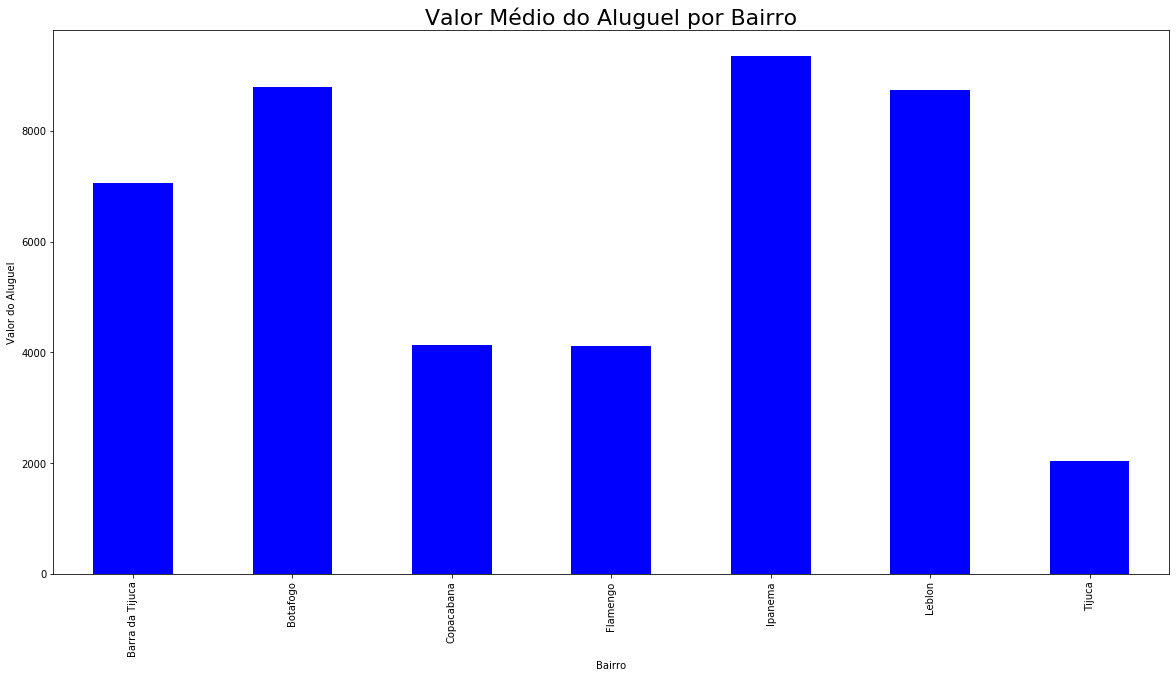

In [55]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do IPTU por Bairro')

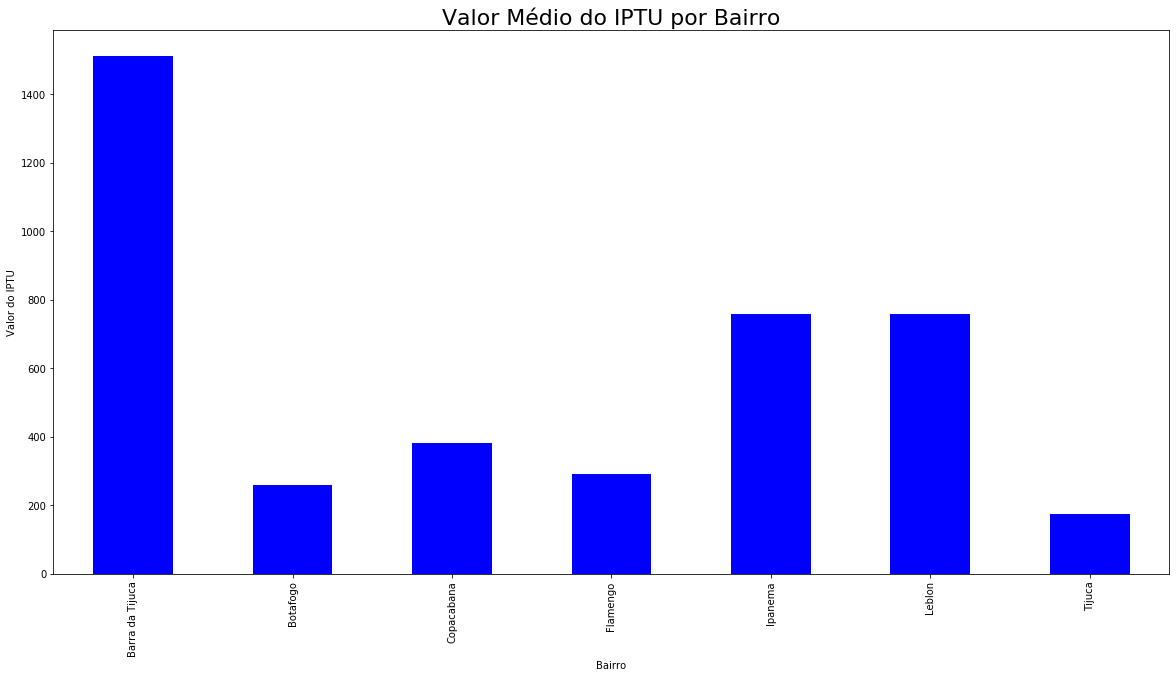

In [57]:
fig = grupo_bairro['IPTU'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do IPTU')
fig.set_title('Valor Médio do IPTU por Bairro', {'fontsize': 22})